# Capstone Project - Car Accident Severity

### <u>Introduction | Business Undertanding <u>

### The Seattle government is going to prevent avoidable car accidents by employing methods that alert drivers, health system, and police to remind them to be more careful in critical situations. 

### <br>In order to reduce the frequency of car collisions in a community, an algorithim must be developed to predict the severity of an accident given the current weather, road and visibility conditions. When conditions are bad, this model will alert drivers to remind them to be more careful.In most cases, not paying enough attention during driving, abusing drugs and alcohol or driving at very high speed are the main causes of occurring accidents that can be prevented by enacting harsher regulations. Besides the aforementioned reasons, weather, visibility, or road conditions are the major uncontrollable factors that can be prevented by revealing hidden patterns in the data and announcing warning to the local government, police and drivers on the targeted roads. 

### <br>The target audience of the project is local Seattle government, police, rescue groups, and last but not least, car insurance institutes. The model and its results are going to provide some advice for the target audience to make insightful decisions for reducing the number of accidents and injuries for the city.

### <u> Data Understanding <u>

#### Our predictor or target variable will be 'SEVERITYCODE' because it is used measure the severity of an accident from 0 to 5 within the dataset. Attributes used to weigh the severity of an accident are 'WEATHER', 'ROADCOND' and 'LIGHTCOND'. The data was collected by the Seattle Police Department and Accident Traffic Records Department from 2004 to present.
The data consists of 37 independent variables and 194,673 rows. The dependent variable, “SEVERITYCODE”, contains numbers that correspond to different levels of severity caused by an accident from 0 to 4.

Severity codes are as follows:<br> <b>

1. Property Damage Only Collision<br>
2. Injury Collision <br></b>

streaming_body_1 = client_3b4d19ae96ba43e3aa551fa97b61f7f9.get_object(Bucket='courseraproject-donotdelete-pr-rtsjyaxd5muifd', Key='Metadata.pdf')['Body']
if not hasattr(streaming_body_1, "__iter__"): streaming_body_1.__iter__ = types.MethodType( __iter__, streaming_body_1 ) 



### <u> Data processing <u>

In the original form, this data is not fit for analysis. Data contain NULL value and also need to be cleaning, converting in to usable data<br>
After analyzing the data set, I have decided to focus on only four features: <br>

#### 1. SEVERITYCODE
#### 2. WEATHER
#### 3. ROADCOND
#### 4. LIGHTCOND

To get a good understanding of the dataset, let's start import and process our data!!!


In [1]:
#Import libraries
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
# The code was removed by Watson Studio for sharing.

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [31]:
#Check value of the "Severity" for the filtered dataframe
df['SEVERITYCODE'].value_counts().to_frame()

,SEVERITYCODE
1,136485
2,58188


As mentioned in "Data Understanding", Our target variable will be <b> SEVERITYCODE </b>. <br>
Other attributes used to weigh the severity of an accident are <b><br>‘ADDRTYPE’, JUNCTIONTYPE’, ‘WEATHER’, ‘ROADCOND’ and ‘LIGHTCOND’</b><br>.and for exploratory data analysis I wanted to choose some of numerical variables such as (PERSONCOUNT, VEHCOUNT, PEDCOUNT, PEDCYLCOUNT)

 Therefore considering below relevant features by dropping others to simplify the dataset. <br>
 1. ‘X’
 2. ‘Y’
 3. ‘COLDETKEY’
 4. ‘REPORTNO’
 5. ‘INTKEY’
 6. ‘LOCATION’
 7. ‘EXCEPTRSNCODE’
 8. ‘EXCEPTRSNDESC’
 9. ‘SEVERITYCODE.1’
 10. ‘SEVERITYDESC’
 11. ‘INCDATE’
 12. ’INCDTTM’
 13. ‘SDOT_COLCODE’
 14. ‘SDOT_COLDESC’
 15. ‘INATTENTIONIND’
 16. ‘UNDERINFL’
 17. ‘PEDROWNOTGRNT’
 18. ‘SDOTCOLNUM’,
 19. ‘SPEEDING’
 20. ‘ST_COLCODE’
 21. ‘ST_COLDESC’
 22. ’SEGLANEKEY’
 23. ‘CROSSWALKKEY’
 24. ‘HITPARKEDCAR’
 25. ‘PERSONCOUNT’
 26. ‘PEDCOUNT’
 27. ‘PEDCYLCOUNT’
 28. ‘VEHCOUNT’
 29. ‘OBJECTID’
 30. ‘COLLISIONTYPE’
 31. ’STATUS’

In [3]:
# Drop collumn not necessary
df.drop(['X','Y','COLDETKEY','REPORTNO','INTKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC','INCDATE','INCDTTM','SDOT_COLCODE','SDOT_COLDESC','INATTENTIONIND','UNDERINFL','PEDROWNOTGRNT','SDOTCOLNUM','SPEEDING','ST_COLCODE','ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR','OBJECTID','STATUS'], axis=1 , inplace = True)


In [4]:
df_num= ['SEVERITYCODE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']
df_cate = ['SEVERITYDESC', 'ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND']

df= df[df_num + df_cate]
df.shape

(194673, 12)

In [30]:
#Afer cleaning Data
df.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SEVERITYDESC,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,2,0,0,2,Injury Collision,2,Angles,1,4,8,5
1,1,2,0,0,2,Property Damage Only Collision,1,Sideswipe,4,6,8,2
2,1,4,0,0,3,Property Damage Only Collision,1,Parked Car,4,4,0,5
3,1,3,0,0,3,Property Damage Only Collision,1,Other,4,1,0,5
4,2,2,0,0,2,Injury Collision,2,Angles,1,6,8,5


### Data selected also contained Missing Value so we need to fulfil these cell

In [5]:
# Find and replace missing value
df['ADDRTYPE'].fillna(value = "others",inplace = True)
df['JUNCTIONTYPE'].fillna(value = "others",inplace = True)
df['WEATHER'].fillna(value = "others",inplace = True)
df['ROADCOND'].fillna(value = "others",inplace = True)
df[['ADDRTYPE','JUNCTIONTYPE','WEATHER','ROADCOND']].isnull().sum()

ADDRTYPE        0
JUNCTIONTYPE    0
WEATHER         0
ROADCOND        0
dtype: int64

Then, I began choosing columns to use from the dataframe that I created. The columns that I chose were SEVERITYCODE, which assigns a crash a value of 1, which means no injury, and 2, indicating injury, COLLISIONTYPE, which describes the type of crash, WEATHER, which describes the weather at the time of crash, ROADCOND, which describes the condition of the road at the time of crash, LIGHTCOND, which describes the light conditions at the time of crash.

In [ ]:
# Number of noninjury collisions vs injury collisions
sns.countplot(df['SEVERITYCODE'], data = df)

We can see there are only 2 types of accident list in this data are:<br>

#### 1. Property Damage Only Collision <br>
#### 2. Injurry Collisions <br>

and the percentage of Injurry Collision to Property Damage Only Collision is around : <b> ~42%<b>

### Graph to visualize selected Attributes & Corellation other attributes 

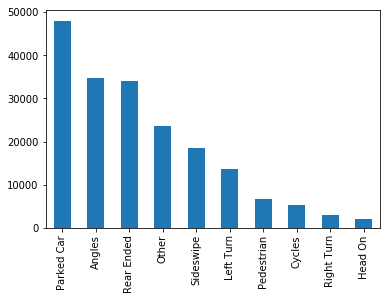

In [22]:
df['COLLISIONTYPE'].value_counts().plot(kind='bar')

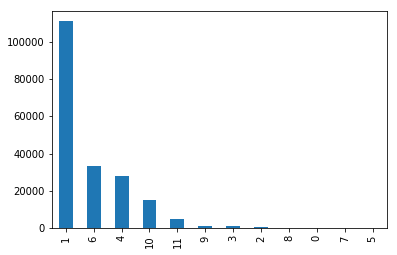

In [23]:
df['WEATHER'].value_counts().plot(kind='bar')

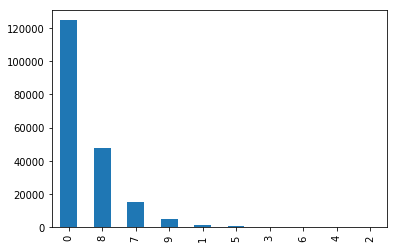

In [24]:
df['ROADCOND'].value_counts().plot(kind='bar')

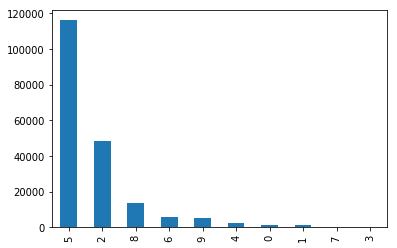

In [25]:
df['LIGHTCOND'].value_counts().plot(kind='bar')

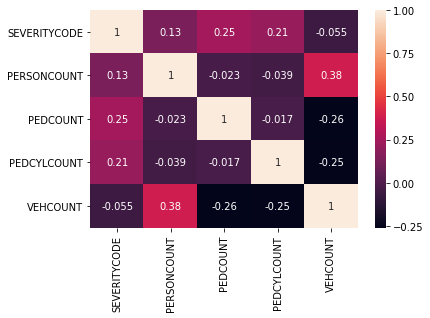

In [26]:
df_corr = df[['SEVERITYCODE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']].corr()
sns.heatmap(df_corr,xticklabels=df_corr.columns,yticklabels=df_corr.columns, annot =True)

#### With the below correlation matrix, on numerical variables we can say that there is no much correlation between any of these variables

### Methodology

For implementing the solution, I have used Github as a repository and running Jupyter Notebook to preprocess data and build Machine Learning models. Regarding coding, I have used Python and its popular packages such as Pandas, NumPy and Sklearn.<br>
Once I have load data into Pandas Dataframe, used <b>‘dtypes’</b> attribute to check the feature names and their data types. Then I have selected the most important features to predict the severity of accidents in Seattle. Among all the features, the following features have the most influence in the accuracy of the predictions: <b><br>
    
    1. "ADDRTYPE"
    2. “JUNCTIONTYPE”,
    3. “ROADCOND”,
    4. “LIGHTCOND”
    5. "WEATHER" 
</b><br>
So before started we have to standardizing these features

In [6]:
from sklearn import preprocessing

addrtype = preprocessing.LabelEncoder()
addrtype.fit(['Intersection','Block','Alley','others'])
df['ADDRTYPE']= addrtype.transform(df['ADDRTYPE'])

junc = preprocessing.LabelEncoder()
df['JUNCTIONTYPE']= junc.fit_transform(df['JUNCTIONTYPE'])
          
roadc = preprocessing.LabelEncoder()
df['ROADCOND'] = roadc.fit_transform(df['ROADCOND'])

lightc = preprocessing.LabelEncoder()
df['LIGHTCOND']= lightc.fit_transform(df['LIGHTCOND'].astype(str))

wea = preprocessing.LabelEncoder()
df['WEATHER']= wea.fit_transform(df['WEATHER'])


After convert data value to usable, we can now use this data in our analysis and ML models!

In [29]:
df.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SEVERITYDESC,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND
0,2,2,0,0,2,Injury Collision,2,Angles,1,4,8,5
1,1,2,0,0,2,Property Damage Only Collision,1,Sideswipe,4,6,8,2
2,1,4,0,0,3,Property Damage Only Collision,1,Parked Car,4,4,0,5
3,1,3,0,0,3,Property Damage Only Collision,1,Other,4,1,0,5
4,2,2,0,0,2,Injury Collision,2,Angles,1,6,8,5


I have employed three machine learning models:

### 1.K Nearest Neighbour (KNN) <br>

### 2. Decision Tree <br>

### 3. Logistic Regression <br>

Let's get started!

### K-Nearest Neighbor (KNN
KNN will help us predict the severity code of an outcome by finding the most similar to data point within k distance.<br>
Here while implementing KNN algorithm, I have taken it for set of 15 values  the model will be trained on training set of data, and then predicting the values based on test data set, Atlast the model accuracy will be calculated by comparing actual values with predicted values of test data set.

In [7]:
# Define X and Y
X = np.asarray(df[['WEATHER',"ROADCOND","LIGHTCOND"]])
X[0:5]

array([[4, 8, 5],
       [6, 8, 2],
       [4, 0, 5],
       [1, 0, 5],
       [6, 8, 5]])

In [8]:
Y = np.asarray(df['SEVERITYCODE'])
Y[0:5]

array([2, 1, 1, 1, 2])

In [9]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.22981187,  1.39847224,  0.25900713],
       [ 0.87758556,  1.39847224, -1.36653782],
       [ 0.22981187, -0.73846749,  0.25900713],
       [-0.74184867, -0.73846749,  0.25900713],
       [ 0.87758556,  1.39847224,  0.25900713]])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print ('Train set', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set (136271, 3) (136271,)
Test set: (58402, 3) (58402,)


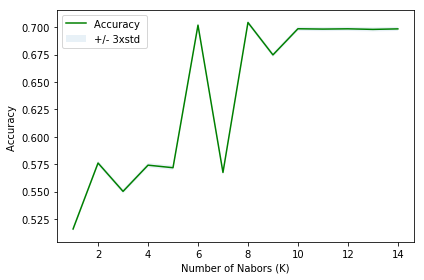

The best accuracy of KNN is  0.7042224581349954 , k= 8


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = []
for n in range(1, Ks):
    # train model and predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print("The best accuracy of KNN is ", mean_acc.max(), ", k=", mean_acc.argmax()+1)

## Decision Tree<br>
A decision tree model gives us a layout of all possible outcomes so we can fully analyze the concequences of a decision. It context, the decision tree observes all possible outcomes of different weather conditions.


In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, Y, test_size=0.3, random_state=3)

n_max_depth = 15
best_max_depth = 1
lists = [[],[]]

for m in range(3, n_max_depth):
    # modelling
    Tree = DecisionTreeClassifier(criterion="entropy", max_depth = m)
    Tree
    Tree.fit(X_trainset, y_trainset)
    pred = Tree.predict(X_testset)
    '''
    print("Prediction:", pred[0:5])
    print("Real Value:", y_testset[0:5])
    '''

    # evaluation
    from sklearn import metrics
    import matplotlib.pyplot as plt
    acc = metrics.accuracy_score(y_testset, pred)
    # print("Accuracy of decision tree: ", acc, ", depth = ", m)
    
    lists[0].append(acc)
    lists[1].append(m)
    if acc== max(lists[0]):
        best_acc = acc
        best_max_depth = m
        best_tree = Tree

print("The best accuracy of DT is ", best_acc, "with a max depth of", best_max_depth)

The best accuracy of DT is  0.6994109790760591 with a max depth of 6


### Logistic Regression <br>
Because our dataset only provides us with two severity code outcomes, our model will only predict one of those two classes. This makes our data binary, which is perfect to use with logistic regression.

In [15]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LogR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LogR

Train set: (155738, 3) (155738,)
Test set: (38935, 3) (38935,)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [16]:
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
yhat = LogR.predict(X_test)
yhat
yhat_prob = LogR.predict_proba(X_test)
yhat_prob

array([[0.72788689, 0.27211311],
       [0.67683024, 0.32316976],
       [0.65535907, 0.34464093],
       ...,
       [0.67283962, 0.32716038],
       [0.74802079, 0.25197921],
       [0.72788689, 0.27211311]])

In [17]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.5986563145341074

### <u>Result <u>
#### Model Evaluation - Finding accuracy of the Model

In [21]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
#test the KNN algorithm already trained with K=6
yhatKNN=neigh.predict(X)
KNNJaccard = jaccard_similarity_score(Y, yhatKNN)
KNNF1 = f1_score(Y, yhatKNN, average='weighted')
print("KNN F1-score: %.2f" % KNNF1 )
print("KNN Jaccard Score: %.2f" % KNNJaccard)

yhatDEC = Tree.predict(X)
DTJaccard = jaccard_similarity_score(Y, yhatDEC)
DTF1 = f1_score(Y, yhatDEC, average='weighted')
print("Decision Tree F1-score: %.2f" % DTF1 )
print("Decision Tree Jaccard Score: %.2f" % DTJaccard)

yhatSVM=clf.predict(X)
SVMJaccard = jaccard_similarity_score(Y, yhatSVM)
SVMF1 = f1_score(Y, yhatSVM, average='weighted')
print("SVM F1-score: %.2f" % SVMF1)
print("SVM Jaccard score: %.2f" % SVMJaccard)

yhatLOG = LogR.predict(X)
yhatLOGproba = LogR.predict_proba(X)
LogRJaccard = jaccard_similarity_score(Y, yhatLOG)
LogRF1 = f1_score(Y, yhatLOG, average='weighted')
Logloss = log_loss(Y, yhatLOGproba)
print("LogLoss: : %.2f" % Logloss)
print("LOG F1-score: %.4f" % LogRF1)
print("LOG Jaccard score: %.4f" % LogRJaccard)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


KNN F1-score: 0.58
KNN Jaccard Score: 0.70
Decision Tree F1-score: 0.58
Decision Tree Jaccard Score: 0.70
SVM F1-score: 0.58
SVM Jaccard score: 0.70
LogLoss: : 0.60
LOG F1-score: 0.5779
LOG Jaccard score: 0.7011


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Once we analysed and cleaned the data, it was then fed through three ML models; K-Nearest Neighbour, Decision Tree and Logistic Regression. Although the first two are ideal for this project, logistic regression made most sense because of its binary nature.<br>

Evaluation metrics used to test the accuracy of our models were jaccard index, f-1 score and logloss for logistic regression. Choosing different k values helped to improve our accuracy to be the best possible. <br>

The final results of the model evaluations are summarized as below <br>


| | Algorithm  | Jaccard    | F1-score   | Logloss   |
|---:|:-------------|:-----------|:------|:------|
| 1 | KNN  | 0.70       | 0.58   | NA     |
| 2 | Decision Tree  | 0.70    | 0.58   | NA     |
| 2 | Logistic Regression  | 0.7011    | 0.577   | NA     |

### <u>Discussion and Conclusion <u>

I have got a decent accuracy value for all classification algorithms. So the best classifier of this problem are Decision Tree, Logistic and KNN based on their accuracy value.<br>

By revealing hidden patterns in predicting severity in accidents based on the features Weather, Road and Light conditions, addresstype, junctiontype have significant impact on whether to travel or not which often result in injury and property damage.<br>

Based on historical data from weather conditions pointing to certain classes, we can conclude that particular weather conditions have a somewhat impact on whether or not travel could result in property damage (class 1) or injury (class 2).<br>

Thank you for reading!